In [5]:
import cv2
import os as os
import pickle
import torch
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torch.nn as nn
import random


import sys
import onnx
import onnx_coreml

import torch
import torch.onnx


In [6]:
from DopeTech import *
from Dataset import *
from model import *

In [16]:
model = TroubleShooter()
model.load_state_dict(torch.load("modelNext", map_location='cpu'))
dummy_input = torch.randn(1, 1, 42, 70)
torch.onnx.export(model, dummy_input, "modelNext.onnx")

In [18]:
model_file = open("modelNext.onnx", 'rb')
model_proto = onnx.onnx_pb.ModelProto()
model_proto.ParseFromString(model_file.read())
coreml_model = onnx_coreml.convert(model_proto, image_input_names='data', image_output_names=['outputImage'])
coreml_model.save("PhoneModelNew")

FileNotFoundError: [Errno 2] No such file or directory: 'modelNext.onnx'

In [20]:
a = 0
for i in range(1,1000):
    a += (1/6) * pow((5/6), i-1) * i
a

6.000000000000001

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


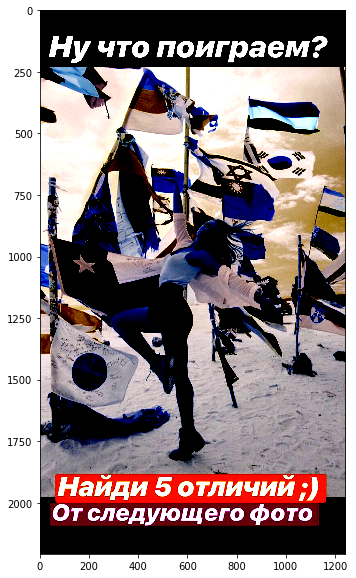

In [40]:
a = cv2.imread("t1.png")
b = cv2.imread("t2.png")
a = (a - a.mean()) / a.std()
b = (b - b.mean()) / b.std()
plt.figure(figsize=(10,10))
c = b - a
plt.imshow(a)